In [1]:

from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Flatten
from keras.layers import Input
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()


In [2]:
data = pd.read_csv("SPAM.csv") #import the csv
list(data.columns) # listed columns names

['Category', 'Message']

In [3]:
texts = [] #create array
labels = []
for i, label in enumerate(data['Category']):   #channge dataset column name ham =0(not spam), spam=1
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts) # np.assarray() using for convert input to array
labels = np.asarray(labels)


print("number of texts :" , len(texts)) 
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [4]:

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=37) # Split data to three part.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=37) #validation part



In [5]:

tk = Tokenizer() #tokenizer using for convert the text to numbers.
tk.fit_on_texts(texts)#convert the number 
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)
X_val_seq = tk.texts_to_sequences(X_val)
print(tk.word_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, '2': 19, 'that': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'or': 26, 'do': 27, 'can': 28, 'at': 29, "i'm": 30, 'ur': 31, 'get': 32, 'will': 33, 'if': 34, 'be': 35, 'with': 36, 'just': 37, 'no': 38, 'we': 39, 'this': 40, '4': 41, 'gt': 42, 'lt': 43, 'up': 44, 'when': 45, 'ok': 46, 'free': 47, 'from': 48, 'go': 49, 'how': 50, 'all': 51, 'out': 52, 'what': 53, 'know': 54, 'like': 55, 'good': 56, 'then': 57, 'got': 58, 'come': 59, 'was': 60, 'its': 61, 'am': 62, 'time': 63, 'day': 64, 'only': 65, 'love': 66, 'there': 67, 'send': 68, 'he': 69, 'want': 70, 'text': 71, 'as': 72, 'txt': 73, 'one': 74, 'going': 75, 'by': 76, 'ü': 77, "i'll": 78, 'need': 79, 'home': 80, 'about': 81, 'r': 82, 'lor': 83, 'sorry': 84, 'still': 85, 'see': 86, 'stop': 87, 'n': 88, 'back': 89, 'today': 90, 'da': 91, 'our': 92,

In [6]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=maxlen)#all sequences in a list have the same length
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=maxlen)
X_val_seq_trunc = pad_sequences(X_val_seq, maxlen=maxlen)#maxlen=500


In [7]:
model = Sequential()
model.add(Embedding(max_features, 37))
model.add(SimpleRNN(units=37)) #create RNN layers
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) #training model
history_rnn = model.fit(x=X_train_seq_trunc,y=y_train,batch_size=16,epochs=5,validation_data=(X_test_seq_trunc,y_test))

Epoch 1/5
209/209 [==============================] - 24s 108ms/step - loss: 0.3288 - acc: 0.8899 - val_loss: 0.0907 - val_acc: 0.9785
Epoch 2/5
209/209 [==============================] - 22s 106ms/step - loss: 0.1267 - acc: 0.9557 - val_loss: 0.0652 - val_acc: 0.9848
Epoch 3/5
209/209 [==============================] - 24s 113ms/step - loss: 0.0485 - acc: 0.9871 - val_loss: 0.0605 - val_acc: 0.9857
Epoch 4/5
209/209 [==============================] - 22s 107ms/step - loss: 0.0152 - acc: 0.9976 - val_loss: 0.0511 - val_acc: 0.9865
Epoch 5/5
209/209 [==============================] - 22s 106ms/step - loss: 0.0092 - acc: 0.9982 - val_loss: 0.0522 - val_acc: 0.9857


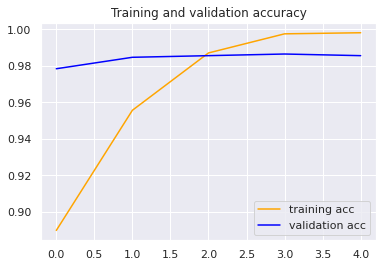

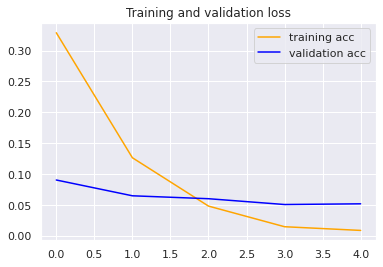

In [9]:
acc = history_rnn.history['acc'] #visualization of comparing vlidation and training 
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
prediction = (model.predict(X_test_seq_trunc) > 0.5).astype("int32") #prediction of test data
acc = model.evaluate(X_test_seq_trunc, y_test)
accuracy_score(y_test, prediction,  normalize=True)
print(confusion_matrix(prediction, y_test))
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(prediction[:10])



35/35 [==============================] - 1s 22ms/step - loss: 0.0522 - acc: 0.9857
[[954  15]
 [  1 145]]
Test loss is 0.05 accuracy is 0.99  
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [11]:
#validation
prediction = (model.predict(X_val_seq_trunc) > 0.5).astype("int32") #prediction of new data
acc = model.evaluate(X_val_seq_trunc, y_val)
accuracy_score(y_test, prediction,  normalize=True)
print(confusion_matrix(prediction, y_val))
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(prediction[:10])




35/35 [==============================] - 1s 23ms/step - loss: 0.0675 - acc: 0.9812
[[979  18]
 [  3 115]]
Test loss is 0.07 accuracy is 0.98  
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


# LTSM

In [12]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32)) # create LTSM layer
model.add(Dense(1, activation='sigmoid'))


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) #training model
history_ltsm = model.fit(x=X_train_seq_trunc,y=y_train,batch_size=16,epochs=5,validation_data=(X_test_seq_trunc,y_test))

Epoch 1/5
209/209 [==============================] - 41s 189ms/step - loss: 0.2277 - acc: 0.9270 - val_loss: 0.0796 - val_acc: 0.9758
Epoch 2/5
209/209 [==============================] - 39s 188ms/step - loss: 0.0486 - acc: 0.9883 - val_loss: 0.0397 - val_acc: 0.9892
Epoch 3/5
209/209 [==============================] - 39s 189ms/step - loss: 0.0239 - acc: 0.9943 - val_loss: 0.0351 - val_acc: 0.9901
Epoch 4/5
209/209 [==============================] - 39s 185ms/step - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0299 - val_acc: 0.9901
Epoch 5/5
209/209 [==============================] - 40s 192ms/step - loss: 0.0050 - acc: 0.9988 - val_loss: 0.0327 - val_acc: 0.9919


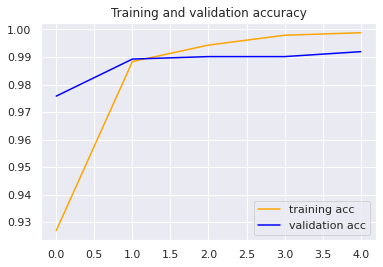

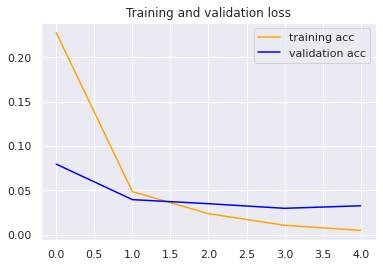

In [14]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
prediction = (model.predict(X_test_seq_trunc) > 0.5).astype("int32") #prediction of test data
acc = model.evaluate(X_test_seq_trunc, y_test)
accuracy_score(y_test, prediction,  normalize=True)
print(confusion_matrix(prediction, y_test))
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(prediction[:10])

35/35 [==============================] - 1s 36ms/step - loss: 0.0327 - acc: 0.9919
[[955   9]
 [  0 151]]
Test loss is 0.03 accuracy is 0.99  
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [16]:
#validation
prediction = (model.predict(X_val_seq_trunc) > 0.5).astype("int32")  #prediction of new data
acc = model.evaluate(X_val_seq_trunc, y_val)
accuracy_score(y_test, prediction,  normalize=True)
print(confusion_matrix(prediction, y_val))
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(prediction[:10])


35/35 [==============================] - 1s 39ms/step - loss: 0.0388 - acc: 0.9883
[[978   9]
 [  4 124]]
Test loss is 0.04 accuracy is 0.99  
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
